# Load data - RNA oligomers with NMR observables

In this notebook we are going to download the data from `Zenodo` storing them in suitably organised directories. Then, we can proceed with running the `Tutorial` notebooks.

We remind you to have a look at our paper https://arxiv.org/pdf/2411.07798 and at the documentation https://www.bussilab.org/doc-MDRefine/MDRefine/index.html.

Required assistance may be opened at https://github.com/bussilab/MDRefine/issues.

In [1]:
import os
import numpy as np
import jax.numpy as jnp
import pandas
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')
from MDRefine import load_data

os.chdir('../')

*Simultaneous refinement of molecular dynamics ensembles and forward models using experimental data* - Thorben Fröhlking, Mattia Bernetti, Giovanni Bussi

*Boosting Ensemble Refinement with Transferable Force-Field Corrections: Synergistic Optimization for Molecular Simulations* - Ivan Gilardoni, Thorben Fröhlking, Giovanni Bussi

### Download from Zenodo

Let's download the data from Zenodo https://zenodo.org/records/10185006 into the folder `DATA_Zenodo`.

Then, there are some staffs to do preliminarly in order to get the following structure of folder `DATA`, which will be loaded directly through `load_data`.

In the folder `DATA` you are going to have:
- a txt file with original coefficients for the forward model (like the Karplus equations, to compute 3J scalar couplings from dihedral angles, for example);
- several subfolders, each of them corresponding to a different molecular system; in each subfolder you will have (some of) the following:
    - a folder `forward_qs` (with .npy files corresponding to forward quantities, such as dihedral angles);
    - a folder `g_exp` (with .npy files corresponding to experimental values and uncertainties);
    - a folder `names` (with names of the observables);
    - a file `ff_terms.npy` with force-field correction terms.

In principle, you may have also `weights.npy`, if absent it means that all the frames have equal weights.

In [3]:
%%bash

curl -O https://zenodo.org/records/10185006/files/DATA.zip

unzip DATA.zip

mv DATA DATA_Zenodo
rm -r DATA.zip

Archive:  DATA.zip
   creating: DATA/
   creating: DATA/observables/
   creating: DATA/observables/CAAU/
  inflating: DATA/observables/CAAU/backbone2_beta_epsilon_3J_refKarplus.npy  
  inflating: DATA/observables/CAAU/backbone2_beta_epsilon_3J.npy  
  inflating: DATA/observables/CAAU/sugar_3J.npy  
  inflating: DATA/observables/CAAU/sugar_3J_refKarplus.npy  
  inflating: DATA/observables/CAAU/NOEs.npy  
  inflating: DATA/observables/CAAU/backbone1_gamma_3J.npy  
  inflating: DATA/observables/CAAU/uNOEs.npy  
  inflating: DATA/observables/CAAU/backbone1_gamma_3J_refKarplus.npy  
   creating: DATA/observables/CCCC/
  inflating: DATA/observables/CCCC/backbone2_beta_epsilon_3J_refKarplus.npy  
  inflating: DATA/observables/CCCC/backbone2_beta_epsilon_3J.npy  
  inflating: DATA/observables/CCCC/sugar_3J.npy  
  inflating: DATA/observables/CCCC/sugar_3J_refKarplus.npy  
  inflating: DATA/observables/CCCC/NOEs.npy  
  inflating: DATA/observables/CCCC/backbone1_gamma_3J.npy  
  inflating: DATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.8G  100 12.8G    0     0  36.9M      0  0:05:56  0:05:56 --:--:-- 38.0M


make a directory `DATA` with the rearranged data from Zenodo

In [4]:
!mkdir DATA

- forward model coefficients

In [5]:
coeffs = np.hstack((np.load('DATA_Zenodo/Karplus_coeffs/backbone1_gamma_original.npy'),
    np.load('DATA_Zenodo/Karplus_coeffs/backbone2_beta_epsilon_original.npy'), 
    np.load('DATA_Zenodo/Karplus_coeffs/sugar_original.npy')))

labels = ['A_gamma', 'B_gamma', 'C_gamma', 'A_beta', 'B_beta', 'C_beta', 'A_sugar', 'B_sugar', 'C_sugar']
f = open('DATA/original_fm_coeffs', 'x')

for i in range(len(labels)):
    f.write(labels[i] + ',' + str(coeffs[i]) + '\n')

f.close()

coeffs = np.hstack((np.load('DATA_Zenodo/Karplus_coeffs/backbone1_gamma_Thorben_ref.npy'),
    np.load('DATA_Zenodo/Karplus_coeffs/backbone2_beta_epsilon_Thorben_ref.npy'), 
    np.load('DATA_Zenodo/Karplus_coeffs/sugar_Thorben_ref.npy')))

labels = ['A_gamma', 'B_gamma', 'C_gamma', 'A_beta', 'B_beta', 'C_beta', 'A_sugar', 'B_sugar', 'C_sugar']
f = open('DATA/fm_coeffs_Thorben_ref', 'x')

for i in range(len(labels)):
    f.write(labels[i] + ',' + str(coeffs[i]) + '\n')

f.close()

- observables, names, forward quantities, force-field correction terms

In [6]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UCAAUC' 'UCUCGU' 'UUUU'
do
    mkdir DATA/${s}

    mkdir DATA/${s}/g_exp
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J' 'NOEs' 'uNOEs'
    do
        mv DATA_Zenodo/g_exp/${s}/${s2}.npy DATA/${s}/g_exp/${s2}.npy
    done

    mkdir DATA/${s}/names
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J' 'NOEs' 'uNOEs'
    do
        mv DATA_Zenodo/names/${s}/${s2}.npy DATA/${s}/names/${s2}.npy
    done

    mkdir DATA/${s}/observables
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J' 'NOEs' 'uNOEs'
    do
        mv DATA_Zenodo/observables/${s}/${s2}.npy DATA/${s}/observables/${s2}.npy
    done

    mkdir DATA/${s}/forward_qs
    for s2 in 'backbone1_gamma' 'backbone2_beta_epsilon' 'sugar'
    do
        mv DATA_Zenodo/angles/${s}/${s2}.npy DATA/${s}/forward_qs/${s2}.npy
    done

    mv DATA_Zenodo/ff_terms/sincos${s} DATA/${s}/ff_terms
    mv DATA_Zenodo/ff_terms_chi_correction/sincos${s} DATA/${s}/ff_terms_chi
done

In [7]:
system_names = ['AAAA', 'CAAU', 'CCCC', 'GACC', 'UUUU', 'UCAAUC', 'UCUCGU']

for name in system_names:
    arr = np.array(pandas.read_csv('DATA/%s/ff_terms' % name))
    np.save('DATA/%s/ff_terms.npy' % name, arr)

- demuxing

In [8]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UUUU'
do
    mv DATA_Zenodo/demuxing/replica_temp${s} DATA/${s}/replica_temp
done

- observables computed with refined (by Thorben) Karplus coefficients

In [9]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UUUU' 'UCAAUC'
do
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J'
    do
        mv DATA_Zenodo/observables/${s}/${s2}_refKarplus.npy DATA/${s}/observables/${s2}_refKarplus.npy
    done
done

- pdb structures

In [10]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UUUU' 'UCAAUC'
do
    mv DATA_Zenodo/pdb_structures/reference_test${s}.pdb DATA/${s}/pdb_structure.pdb
done

In [11]:
!rm -r DATA_Zenodo

In [12]:
for s in ['UCAAUC', 'UCUCGU']:
    v = np.load('DATA/%s/ff_terms.npy' % s)[:, 1:]
    np.save('DATA/%s/ff_terms.npy' % s, v)

- for UUUU tetramer, observables are known only in the first 836000 frames

In [13]:
for s in ['forward_qs/backbone1_gamma', 'forward_qs/backbone2_beta_epsilon', 'forward_qs/sugar', 'ff_terms']:
    arr = np.load('DATA/UUUU/' + s + '.npy')[:836000,:]
    np.save('DATA/UUUU/' + s + '.npy', arr)

df = pandas.read_csv('DATA/UUUU/ff_terms').iloc[:836000]

### Load data

Define `infos` dictionary, which specifies required information in order to get data from input files through `load_data`.

#### Load observables (no force-field terms and no forward quantities)

In [14]:
infos = {}

# Firstly, define global properties, valid for all the systems:

infos['global'] = {}

# 'name of the folder with data'
infos['global']['path_directory'] = 'DATA'

# system names
system_names = ['AAAA', 'CAAU']
infos['global']['system_names'] = system_names

# Then, define properties which are specific of each system, like experimental data and observables

for name in system_names:
    infos[name] = {}
    
    # experimental observables (average and uncertainty), corresponding to 'file_name'.npy in DATA/system_name/g_exp/
    # uNOEs values are upper bounds, so specify '<' with ('uNOEs','<')
    infos[name]['g_exp'] = ['NOEs', ('uNOEs','<')]
    
    # observables from MD simulations, corresponding to 'file_name'.npy in DATA/system_name/observables/
    # they must correspond also to items of infos[name]['g_exp']
    infos[name]['obs'] = ['NOEs', 'uNOEs']

# If some properties are the same for all the systems, you can store them just once in infos['global']

infos['global']['temperature'] = 1 # namely, energies are in unit of k_B T (default value)
# (in this case, you could do this also for 'g_exp' and 'obs')

# Select the stride for the frames (thinner strides will require more time for minimizations; default value = 1)
stride = 1000

In [15]:
data = load_data(infos, stride=stride)

loading data from directory...
loading  AAAA


loading  CAAU
done


Let's see what `data` contains:

- `data.properties` contains `system_names` and `tot_n_experiments` (which computes total n. of experiments given data)

In [16]:
print(vars(data.properties))

print('tot. n. of experiments: ', data.properties.tot_n_experiments(data))

{'system_names': ['AAAA', 'CAAU']}
tot. n. of experiments:  696


- for `name_sys` in `system_names`, `data.mol['name_sys']` contains:
    - the observables `g` and the experimental values `gexp`;
    - the corresponding `names` of the observables, which are `n_experiments` in total;
    - the `weights` for each frame in the trajectory, which are `n_frames` in total (considering the stride);
    - `ref` specifies if the experimental values are exact values ($\pm$ uncertainty) or boundaries;
    - the `temperature`.

In [17]:
vars(data.mol['AAAA']).keys()

dict_keys(['temperature', 'gexp', 'names', 'ref', 'g', 'weights', 'n_experiments', 'n_frames'])

Let's look at the observables for system `s1` of kind `s2`; let's compare their average value (resulting from MD simulation) to the experimental value. 

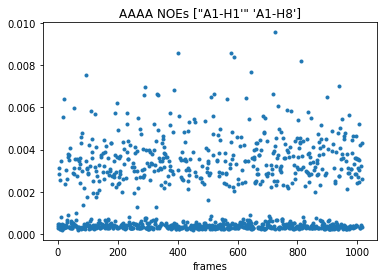

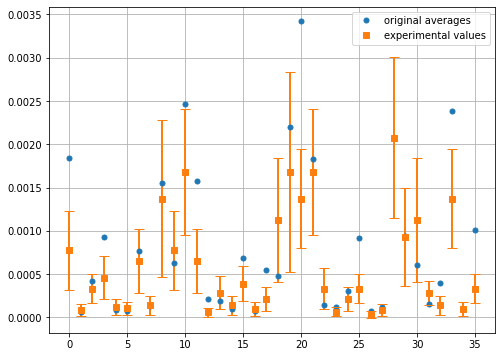

In [18]:
s1 = 'AAAA'
s2 = 'NOEs'

g_mean = np.einsum('ij,i->j', data.mol[s1].g[s2], data.mol[s1].weights)

i = 0
plt.plot(data.mol[s1].g[s2][:,i],'.')
plt.title(s1 + ' ' + s2 + ' ' + str(data.mol[s1].names[s2][i]))
plt.xlabel('frames')

plt.figure(figsize = (8,6))

x = np.arange(len(data.mol[s1].gexp[s2][:,0]))
plt.plot(g_mean, '.', label = 'original averages', markersize=10)
plt.plot(data.mol[s1].gexp[s2][:,0], 's', label = 'experimental values')
plt.errorbar(x, data.mol[s1].gexp[s2][:,0], data.mol[s1].gexp[s2][:,1], fmt = ' ', color = 'tab:orange', capsize = 5, lw = 2)

# xlabels = [data.mol[s1].names[s2][i,0] + data.mol[s1].names[s2][i,1] for i in range(len(v1))]
# plt.xticks(x, xlabels)

plt.legend()
plt.grid()

#### Include also quantities computed through a **forward model**.

Besides previously defined `infos`:

In [19]:
for name in system_names:
    # include experimental values also for 3J scalar couplings
    infos[name]['g_exp'] = ['backbone1_gamma_3J', 'backbone2_beta_epsilon_3J', 'sugar_3J', 'NOEs', ('uNOEs','<')]

    # include quantities required to compute observables through the forward model
    # they must correspond to 'file_name'.npy in DATA/system_name/forward_qs/
    infos[name]['forward_qs'] = ['backbone1_gamma', 'backbone2_beta_epsilon', 'sugar']

# starting values of the forward model coefficients: specify the file name inside DATA/
infos['global']['forward_coeffs'] = 'original_fm_coeffs' # string

Now, define the `forward_model`.

In our case-study, the forward model is given by the **Karplus equations**:

$^3 J_\gamma = A_\gamma \, cos^2\gamma \, - \, B_\gamma \, cos\gamma \, + \, C_\gamma$

with empirical coefficients $A_\gamma,\,B_\gamma,\,C_\gamma$ ($\gamma$ dihedral angles), and analogously for $^3 J_{\beta/\epsilon}$ (same coefficients both for $\beta$ and $\epsilon$ dihedral angles) and $^3J_\nu$ (sugar dihedral angles).

**WARNING**: the keys of `forward_qs_out` must correspond to associated `gexp`, as specified in `infos`

In [20]:
def forward_model_fun(fm_coeffs, forward_qs, selected_obs = None):

    # 1. compute the cosine (which is the quantity you need in the forward model;
    # you could do this just once before loading data)
    forward_qs_cos = {}

    for type_name in forward_qs.keys():
        forward_qs_cos[type_name] = np.cos(forward_qs[type_name])

    # if you have selected_obs, compute only the corresponding observables
    if selected_obs is not None:
        for type_name in forward_qs.keys():
            forward_qs_cos[type_name] = forward_qs_cos[type_name][:,selected_obs[type_name+'_3J']]

    # 2. compute observables (forward_qs_out) through forward model
    forward_qs_out = {
        'backbone1_gamma_3J': fm_coeffs[0]*forward_qs_cos['backbone1_gamma']**2-fm_coeffs[1]*forward_qs_cos['backbone1_gamma']+fm_coeffs[2],
        'backbone2_beta_epsilon_3J': fm_coeffs[3]*forward_qs_cos['backbone2_beta_epsilon']**2-fm_coeffs[4]*forward_qs_cos['backbone2_beta_epsilon']+fm_coeffs[5],
        'sugar_3J': fm_coeffs[6]*forward_qs_cos['sugar']**2-fm_coeffs[7]*forward_qs_cos['sugar']+fm_coeffs[8] }

    return forward_qs_out

same forward-model function for each system, so put it in `infos['global']`

In [21]:
infos['global']['forward_model'] = forward_model_fun

In [22]:
data = load_data(infos, stride=stride)

loading data from directory...
loading  AAAA
loading  CAAU
done


Now, `data.properties` contains also  `forward_coeffs_0`, namely, the initial guess of coefficients for the forward model, used to compute the corresponding observables inserted in `g`; by default, they are in `path_directory + 'original_coeffs'` txt file.

In [23]:
print(vars(data.properties))

print('tot. n. of experiments: ', data.properties.tot_n_experiments(data))

{'system_names': ['AAAA', 'CAAU'], 'forward_coeffs_0': 0
A_gamma     9.70
B_gamma    -1.80
C_gamma     0.00
A_beta     15.30
B_beta     -6.10
C_beta      1.60
A_sugar     9.67
B_sugar    -2.03
C_sugar     0.00
Name: 1, dtype: float64}
tot. n. of experiments:  751


and `data.mol[name_sys]` contains also:
- `forward_model` and `forward_qs`, respectively, function and input values employed to compute observables through forward model;
- `gexp` and `g` with values corresponding to observables computed through forward model.

In [24]:
vars(data.mol['AAAA']).keys()

dict_keys(['temperature', 'gexp', 'names', 'ref', 'g', 'forward_model', 'forward_qs', 'weights', 'n_experiments', 'n_frames'])